Task Dataset: Molecular activity of molecules over the Dopamine2 Receptors

Goal:
Students should whatever means necessary to make the best possible machine learning supervised model for inferring molecular activity. This is a regression problem, and Regresion models should be used

Modelos a experimentar:

- Regressão Linear Simples e Múltipla: Assume uma relação linear entre as variáveis de entrada e a variável alvo

- Ridge Regression: Extensão da regressão linear que adiciona um termo de regularização L2 para evitar overfitting

- LASSO Regression: Usa uma penalização L1, que penaliza os coeficientes não importantes, fazendo com que muitos deles se tornem exatamente zero

- Elastic Net Regression: Combinação da regressão Ridge e LASSO, incorporando termos de regularização L1 e L2

- Árvores de Decisão para Regressão: Utilizam árvores para dividir os dados em subconjuntos e, em seguida, calculam a média dos valores da variável alvo em cada folha

- Random Forest para Regressão: Coleção de árvores de decisão, onde a predição é a média das previsões de todas as árvores

- K-Nearest Neighbors (KNN) para Regressão: Determina a saída baseada na média dos k vizinhos mais próximos em termos de distância euclidiana

- SVR (Support Vector Regression): Encontra uma função que mantenha a margem de separação entre as predições e os pontos de dados

- Gradient Boosting para Regressão (XGBoost): Constroi árvores sequencialmente, corrigindo os erros dos modelos anteriores

- Redes Neurais: Eficazes em lidar com grandes conjuntos de dados e problemas complexos. Redes neurais podem ter arquiteturas variadas, incluindo redes neurais simples, redes profundas e redes recorrentes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import *
from sklearn.feature_selection import SelectFromModel
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, Perceptron
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.svm import LinearSVR, SVR, NuSVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
    
def printRegStatistics(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval = pearsonr(truth, preds)
    print("The Correlation Score is: %6.4f (p-value=%e)"%(corr,pval))
    print("The Maximum Error is: ", max_error(truth, preds))
    print("The Mean Absolute Error is: ", mean_absolute_error(truth, preds))

def naif_model_testingR(X_train, X_test, y_train, y_test):
    
    rfr= RandomForestRegressor()
    
    rfr.fit(X_train, y_train)

    rf_preds=rfr.predict(X_test)
    
    printRegStatistics(y_test,rf_preds)
    
def regression(truth, preds):
    
    plt.figure()
    plt.scatter(preds, truth)
    plt.grid()
    plt.plot([0, 1], [0, 1], c="r")
    plt.xlabel('Predicts')
    plt.ylabel('Truth')
    plt.show()
    
    return printRegStatistics(truth, preds)

In [2]:
X, X_ivs, y, col_names = pickle.load(open("drd2_data.pickle", "rb"))
df = pd.DataFrame(data=X, columns=col_names)
print('Nulos: ' + str(df.isna().sum().sum()))
print(df.shape)
df.describe()

Nulos: 0
(7337, 2132)


,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2079,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088
count,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,...,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000
mean,430.518010,431.037078,5.430285,1.206897,6.527327,1.128799,4.678070,30.497615,59.165190,6.594930,...,0.396211,0.036800,0.031075,0.088456,0.027668,0.011040,0.018264,0.038026,0.094725,0.036800
std,181.613020,181.757699,4.160569,2.527815,5.983082,2.218665,2.789156,12.882724,25.749585,4.403703,...,0.489143,0.188283,0.173533,0.283976,0.164031,0.104497,0.133912,0.191273,0.292855,0.188283
min,135.068414,135.166000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,19.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,357.124405,357.429000,4.000000,0.000000,4.000000,0.000000,3.000000,25.000000,49.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,419.107040,419.500000,5.000000,1.000000,6.000000,1.000000,4.000000,30.000000,57.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,472.228141,472.888000,6.000000,1.000000,8.000000,1.000000,6.000000,33.000000,65.000000,8.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3768.848446,3771.262000,92.000000,47.000000,137.000000,42.000000,58.000000,266.000000,527.000000,93.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
scaler = PowerTransformer(standardize = True)
scaler.fit_transform(X_train)

X = scaler.transform(X)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_ivs = scaler.transform(X_ivs)

naif_model_testingR(X_train, X_test, y_train, y_test)

The RVE is:  0.6180846548412483
The rmse is:  0.1700536554934046
The Correlation Score is: 0.7883 (p-value=0.000000e+00)
The Maximum Error is:  0.8508378575099997
The Mean Absolute Error is:  0.1262935597324835


In [35]:
pca = PCA(n_components=1000)
pca.fit(X_train)

pcaX_train=pca.transform(X_train)
pcaX_test=pca.transform(X_test)

naif_model_testingR(pcaX_train, pcaX_test, y_train, y_test)

The RVE is:  0.48753793630556364
The rmse is:  0.19701456520553384
The Correlation Score is: 0.7055 (p-value=2.051001e-276)
The Maximum Error is:  0.7859718071499999
The Mean Absolute Error is:  0.153296500072781


In [36]:
kpca=KernelPCA(n_components=1000)
kpca.fit(X_train)

kpcaX_train=kpca.transform(X_train)
kpcaX_test=kpca.transform(X_test)

naif_model_testingR(kpcaX_train, kpcaX_test, y_train, y_test)

The RVE is:  0.4986338695538042
The rmse is:  0.19487520718235937
The Correlation Score is: 0.7135 (p-value=1.629464e-285)
The Maximum Error is:  0.7936280858225
The Mean Absolute Error is:  0.15199405795636856


In [16]:
rfr=RandomForestRegressor(random_state=0)
sel = SelectFromModel(estimator=rfr)
sel.fit(X_train, y_train)

X_total = sel.transform(X)
nX_train=sel.transform(X_train)
nX_test=sel.transform(X_test)
nX_IVS=sel.transform(X_ivs)

print('nX_train shape: ' + str(nX_train.shape))

naif_model_testingR(nX_train, nX_test, y_train, y_test)

nX_train shape: (5502, 356)
The RVE is:  0.6163673207413249
The rmse is:  0.17041159962742164
The Correlation Score is: 0.7871 (p-value=0.000000e+00)
The Maximum Error is:  0.8951179143149999
The Mean Absolute Error is:  0.12707606750003966


## Decision Tree

In [38]:
dt = DecisionTreeRegressor()

dt.fit(nX_train, y_train)

preds = dt.predict(nX_test)

printRegStatistics(y_test, preds)

The RVE is:  0.22168586168932303
The rmse is:  0.24279900266018523
The Correlation Score is: 0.6070 (p-value=3.718102e-185)
The Maximum Error is:  1.0
The Mean Absolute Error is:  0.16894183241198912


## Random Forest

Métricas com Feature Selection:


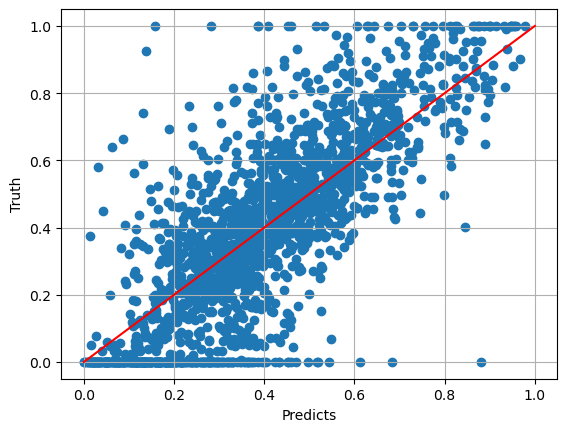

The RVE is:  0.6172966402784308
The rmse is:  0.17021868288718614
The Correlation Score is: 0.7878 (p-value=0.000000e+00)
The Maximum Error is:  0.8808809167566666
The Mean Absolute Error is:  0.12691121911880326

Métricas sem Feature Selection:

The RVE is:  0.6271738496359776
The rmse is:  0.16801784577945014
The Correlation Score is: 0.7944 (p-value=0.000000e+00)
The Maximum Error is:  0.8590144201399997
The Mean Absolute Error is:  0.12546796708884836


In [9]:
rf = RandomForestRegressor()

rf.fit(nX_train, y_train)
preds=rf.predict(nX_test)
print('Métricas com Feature Selection:')
regression(y_test, preds)

rf.fit(X_train, y_train)
preds_semfs=rf.predict(X_test)
print('\nMétricas sem Feature Selection:\n')
printRegStatistics(y_test, preds_semfs)

10
20
30
40


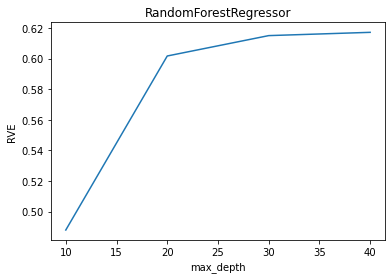

In [40]:
max_depth = [10, 20, 30, 40]
RVE=[]

for x in max_depth:
    rf = RandomForestRegressor(max_depth = x)
    rf.fit(nX_train, y_train)
    preds=rf.predict(nX_test)
    RVE.append(explained_variance_score(y_test, preds))
    print(x)
    
plt.plot(max_depth,RVE)  
plt.xlabel('max_depth')
plt.ylabel('RVE')
plt.title("RandomForestRegressor")
plt.show()

3
5
7
10


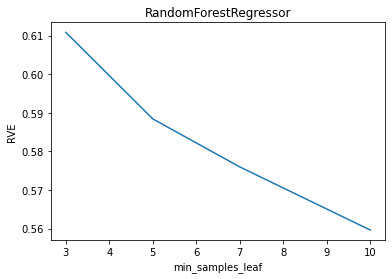

In [41]:
min_samples_leaf = [3,5,7,10]
RVE=[]

for x in min_samples_leaf:
    rf = RandomForestRegressor(min_samples_leaf=x)
    rf.fit(nX_train, y_train)
    preds=rf.predict(nX_test)
    RVE.append(explained_variance_score(y_test, preds))
    print(x)
    
plt.plot(min_samples_leaf,RVE)
plt.xlabel('min_samples_leaf')
plt.ylabel('RVE')
plt.title("RandomForestRegressor")
plt.show()

50
100
200


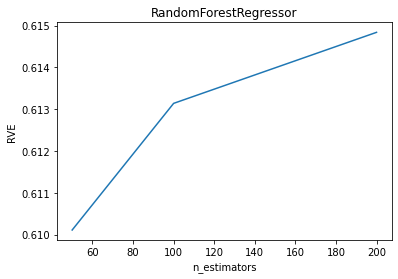

In [42]:
n_estimators = [50, 100, 200]
RVE=[]

for x in n_estimators:
    rf = RandomForestRegressor(n_estimators=x)
    rf.fit(nX_train, y_train)
    preds=rf.predict(nX_test)
    RVE.append(explained_variance_score(y_test, preds))
    print(x)
    
plt.plot(n_estimators,RVE)
plt.xlabel('n_estimators')
plt.ylabel('RVE')
plt.title("RandomForestRegressor")
plt.show()

Métricas com Feature Selection:


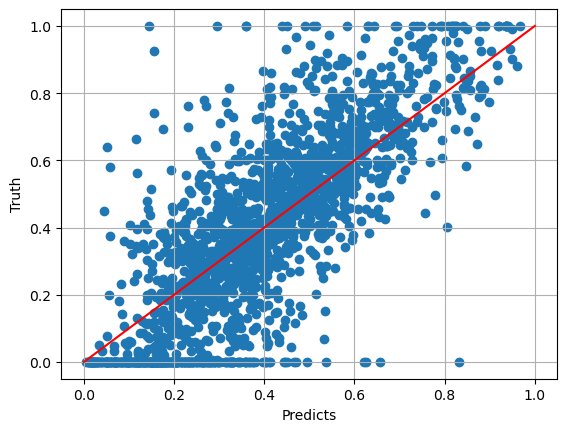

The RVE is:  0.610141439645177
The rmse is:  0.17178968081108306
The Correlation Score is: 0.7846 (p-value=0.000000e+00)
The Maximum Error is:  0.8563323318239984
The Mean Absolute Error is:  0.12892740991865306

Métricas sem Feature Selection:

The RVE is:  0.6120551817579696
The rmse is:  0.17134788850506139
The Correlation Score is: 0.7860 (p-value=0.000000e+00)
The Maximum Error is:  0.8225069619295623
The Mean Absolute Error is:  0.12866676677725547


In [10]:
rf = RandomForestRegressor(max_depth=30, min_samples_leaf=3, n_estimators=150)

rf.fit(nX_train, y_train)
preds=rf.predict(nX_test)
print('Métricas com Feature Selection:')
regression(y_test, preds)

rf.fit(X_train, y_train)
preds_semfs=rf.predict(X_test)
print('\nMétricas sem Feature Selection:\n')
printRegStatistics(y_test, preds_semfs)

## Linear Regression

In [44]:
simple_lr = LinearRegression()

simple_lr.fit(nX_train, y_train)

preds = simple_lr.predict(nX_test)

printRegStatistics(y_test, preds)

The RVE is:  0.47541814458038856
The rmse is:  0.1992658518320032
The Correlation Score is: 0.6921 (p-value=7.929124e-262)
The Maximum Error is:  0.8374124723814053
The Mean Absolute Error is:  0.15438694752935558


## Lasso

In [45]:
ls = Lasso()
ls.fit(nX_train, y_train)
preds = ls.predict(nX_test)
printRegStatistics(y_test, preds)

The RVE is:  0.0
The rmse is:  0.27510556861814905
The Correlation Score is:    nan (p-value=nan)
The Maximum Error is:  0.6112481078215195
The Mean Absolute Error is:  0.2269520313755341


C:\Users\10raq\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


## Ridge

In [46]:
rg = Ridge()
rg.fit(nX_train, y_train)
preds = rg.predict(nX_test)
printRegStatistics(y_test, preds)

The RVE is:  0.47545988863490807
The rmse is:  0.1992565552132583
The Correlation Score is: 0.6919 (p-value=1.206584e-261)
The Maximum Error is:  0.8294415293630545
The Mean Absolute Error is:  0.15448242708706672


## SVR

In [47]:
svr = SVR(kernel='rbf')

svr.fit(nX_train, y_train)

preds = svr.predict(nX_test)

printRegStatistics(y_test, preds)

The RVE is:  0.6348232255676027
The rmse is:  0.16644002014345627
The Correlation Score is: 0.7984 (p-value=0.000000e+00)
The Maximum Error is:  0.7815461437310365
The Mean Absolute Error is:  0.12628340968072146


0.5
1
3
7
10


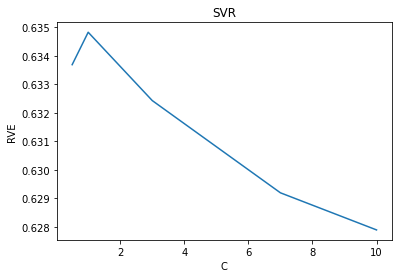

In [48]:
c = [0.5,1,3,7,10]
RVE=[]

for x in c:
    svr = SVR(kernel='rbf', C=x)
    svr.fit(nX_train, y_train)
    preds = svr.predict(nX_test)
    RVE.append(explained_variance_score(y_test, preds))
    print(x)
    
plt.plot(c,RVE)
plt.xlabel('C')
plt.ylabel('RVE')
plt.title("SVR")
plt.show()

[0.6162099582737794]
[0.6162099582737794, 0.6348232255676027]


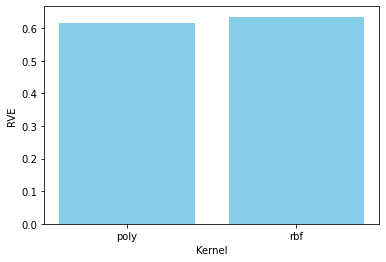

In [49]:
kernel = ["poly", "rbf"] #linear muito lento, sigmoide RVE negativo
RVE=[]

for x in kernel:
    svr = SVR(kernel=x, C=1)
    svr.fit(nX_train, y_train)
    preds = svr.predict(nX_test)
    RVE.append(explained_variance_score(y_test, preds))
    print(RVE)

plt.bar(kernel, RVE, color='skyblue')
plt.xlabel('Kernel')
plt.ylabel('RVE')
plt.show()

[0.629061004489885]
[0.629061004489885, 0.6124579259530674]
[0.629061004489885, 0.6124579259530674, 0.560718113279687]
[0.629061004489885, 0.6124579259530674, 0.560718113279687, 0.4824719524823803]


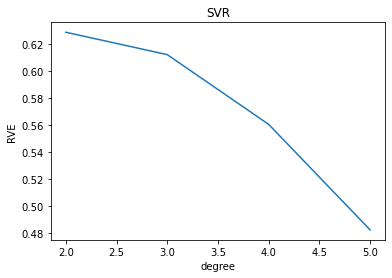

In [50]:
d = [2,3,4,5] #linear muito lento, sigmoide RVE negativo
RVE=[]

for x in d:
    svr = SVR(kernel='poly', C=0.5, degree=x)
    svr.fit(nX_train, y_train)
    preds = svr.predict(nX_test)
    RVE.append(explained_variance_score(y_test, preds))
    print(RVE)

plt.plot(d,RVE)
plt.xlabel('degree')
plt.ylabel('RVE')
plt.title("SVR")
plt.show()

[0.6488546142793914]
[0.6488546142793914, 0.6494850704472914]
[0.6488546142793914, 0.6494850704472914, 0.6481565926398056]
[0.6488546142793914, 0.6494850704472914, 0.6481565926398056, 0.6410704134288628]
[0.6488546142793914, 0.6494850704472914, 0.6481565926398056, 0.6410704134288628, 0.6336853980177959]


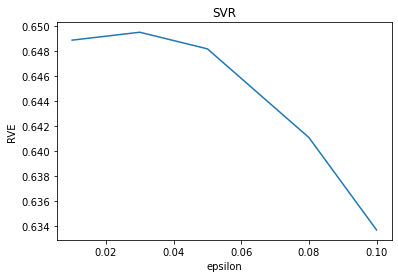

In [51]:
epsilon=[0.01,0.03,0.05,0.08,0.1]
RVE=[]

for x in epsilon:
    svr = SVR(kernel='rbf', C=0.5, gamma='scale', epsilon=x)
    svr.fit(nX_train, y_train)
    preds = svr.predict(nX_test)
    RVE.append(explained_variance_score(y_test, preds))
    print(RVE)

plt.plot(epsilon, RVE)
plt.xlabel('epsilon')
plt.ylabel('RVE')
plt.title("SVR")
plt.show()

Métricas com Feature Selection:


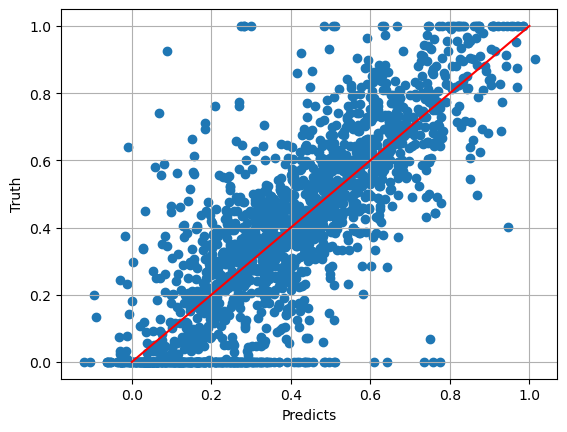

The RVE is:  0.6507808157823853
The rmse is:  0.16263089691095647
The Correlation Score is: 0.8068 (p-value=0.000000e+00)
The Maximum Error is:  0.8375492358840964
The Mean Absolute Error is:  0.1180983460336773

Métricas sem Feature Selection:

The RVE is:  0.637529192762439
The rmse is:  0.16577179723579355
The Correlation Score is: 0.7990 (p-value=0.000000e+00)
The Maximum Error is:  0.8812146418980419
The Mean Absolute Error is:  0.12301047292686354


In [11]:
svr = SVR(kernel='rbf', C=1, epsilon=0.03, gamma='scale')

svr.fit(nX_train, y_train)
preds = svr.predict(nX_test)
print('Métricas com Feature Selection:')
regression(y_test, preds)

svr.fit(X_train, y_train)
preds_semfs=svr.predict(X_test)
print('\nMétricas sem Feature Selection:\n')
printRegStatistics(y_test, preds_semfs)

## Linear SVR

In [53]:
l_svr = LinearSVR()

l_svr.fit(nX_train, y_train)

preds = l_svr.predict(nX_test)

printRegStatistics(y_test, preds)

C:\Users\10raq\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


The RVE is:  0.15108617661412715
The rmse is:  0.2544575926261532
The Correlation Score is: 0.5654 (p-value=1.534943e-155)
The Maximum Error is:  1.08535717288656
The Mean Absolute Error is:  0.1963667275744524


C:\Users\10raq\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## NuSVR

In [54]:
svr_nu = NuSVR()

svr_nu.fit(nX_train, y_train)

preds = svr_nu.predict(nX_test)

printRegStatistics(y_test, preds)

The RVE is:  0.6476203423181979
The rmse is:  0.163346532828169
The Correlation Score is: 0.8055 (p-value=0.000000e+00)
The Maximum Error is:  0.8310007288934766
The Mean Absolute Error is:  0.11717397263043947


0.5
1
3
7


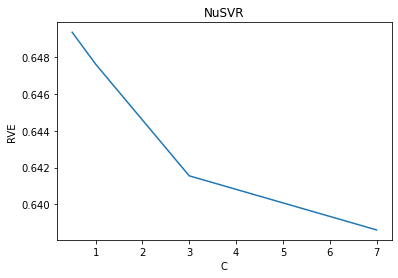

In [55]:
c = [0.5,1,3,7]
RVE=[]

for x in c:
    svr_nu = NuSVR(C=x)
    svr_nu.fit(nX_train, y_train)
    preds = svr_nu.predict(nX_test)
    RVE.append(explained_variance_score(y_test, preds))
    print(x)
    
plt.plot(c,RVE)
plt.xlabel('C')
plt.ylabel('RVE')
plt.title("NuSVR")
plt.show()

0.3
0.5
0.7
1


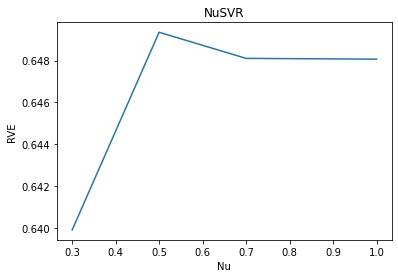

In [56]:
nu = [0.3, 0.5, 0.7, 1]
RVE=[]

for x in nu:
    svr_nu = NuSVR(nu=x, C=0.5)
    svr_nu.fit(nX_train, y_train)
    preds = svr_nu.predict(nX_test)
    RVE.append(explained_variance_score(y_test, preds))
    print(x)
    
plt.plot(nu,RVE)
plt.xlabel('Nu')
plt.ylabel('RVE')
plt.title("NuSVR")
plt.show()

[0.6311202062400872]
[0.6311202062400872, 0.6493490703248954]


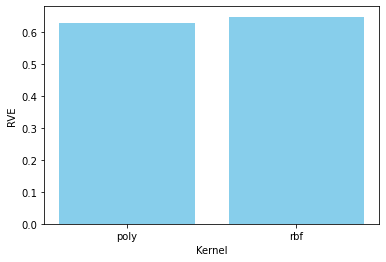

In [57]:
kernel = ["poly", "rbf"] #linear muito lento, sigmoide RVE negativo
RVE=[]

for x in kernel:
    svr_nu = NuSVR(kernel=x, C=0.5, nu=0.5)
    svr_nu.fit(nX_train, y_train)
    preds = svr_nu.predict(nX_test)
    RVE.append(explained_variance_score(y_test, preds))
    print(RVE)

plt.bar(kernel, RVE, color='skyblue')
plt.xlabel('Kernel')
plt.ylabel('RVE')
plt.show()

[0.6455830407478491]
[0.6455830407478491, 0.6369946001340621]
[0.6455830407478491, 0.6369946001340621, 0.6267649720163231]
[0.6455830407478491, 0.6369946001340621, 0.6267649720163231, 0.6139945680649084]


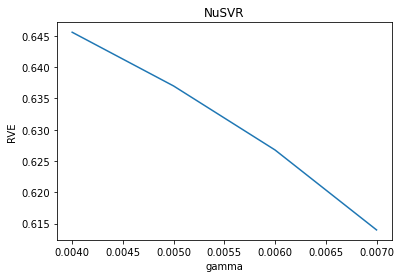

In [58]:
gamma=[0.004,0.005,0.006,0.007]
RVE=[]

for x in gamma:
    svr_nu = NuSVR(kernel='rbf', C=0.5, nu=0.5, gamma=x)
    svr_nu.fit(nX_train, y_train)
    preds = svr_nu.predict(nX_test)
    RVE.append(explained_variance_score(y_test, preds))
    print(RVE)

plt.plot(gamma, RVE)
plt.xlabel('gamma')
plt.ylabel('RVE')
plt.title("NuSVR")
plt.show()

Métricas com Feature Selection:


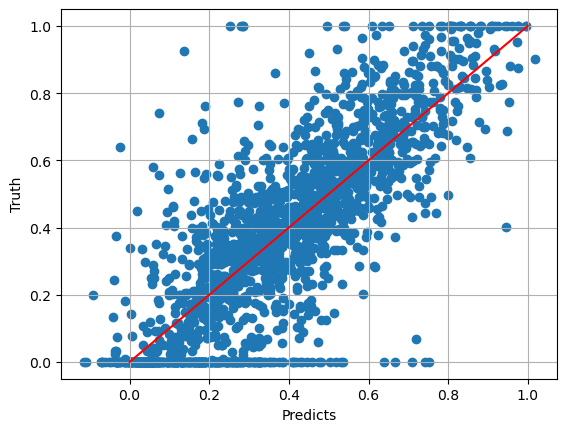

The RVE is:  0.649360573266315
The rmse is:  0.16290493454098526
The Correlation Score is: 0.8058 (p-value=0.000000e+00)
The Maximum Error is:  0.788991894520686
The Mean Absolute Error is:  0.1181312673504074

Métricas sem Feature Selection:

The RVE is:  0.6392490959216073
The rmse is:  0.16528719971866845
The Correlation Score is: 0.7996 (p-value=0.000000e+00)
The Maximum Error is:  0.8204474201380529
The Mean Absolute Error is:  0.12151990326320426


In [12]:
svr_nu = NuSVR(C=0.5, nu=0.5, gamma='scale')

svr_nu.fit(nX_train, y_train)
preds = svr_nu.predict(nX_test)
print('Métricas com Feature Selection:')
regression(y_test, preds)

svr_nu.fit(X_train, y_train)
preds_semfs=svr_nu.predict(X_test)
print('\nMétricas sem Feature Selection:\n')
printRegStatistics(y_test, preds_semfs)

## KNeighbors

In [60]:
knr = KNeighborsRegressor(n_neighbors=5, weights='distance')
knr.fit(nX_train, y_train)
preds = knr.predict(nX_test)
printRegStatistics(y_test, preds)

The RVE is:  0.6262478330113775
The rmse is:  0.16821657992674968
The Correlation Score is: 0.7935 (p-value=0.000000e+00)
The Maximum Error is:  0.8313183381042155
The Mean Absolute Error is:  0.12185150407063164


In [61]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\10raq\anaconda3\lib\site-packages (1.3.2)
Note: you may need to restart the kernel to use updated packages.


[0.4811732440502511]
[0.4811732440502511, 0.5756046999525164]
[0.4811732440502511, 0.5756046999525164, 0.6198332503650097]
[0.4811732440502511, 0.5756046999525164, 0.6198332503650097, 0.6209861570172273]
[0.4811732440502511, 0.5756046999525164, 0.6198332503650097, 0.6209861570172273, 0.6186737565191764]
[0.4811732440502511, 0.5756046999525164, 0.6198332503650097, 0.6209861570172273, 0.6186737565191764, 0.6138066796129338]
[0.4811732440502511, 0.5756046999525164, 0.6198332503650097, 0.6209861570172273, 0.6186737565191764, 0.6138066796129338, 0.607765191450714]
[0.4811732440502511, 0.5756046999525164, 0.6198332503650097, 0.6209861570172273, 0.6186737565191764, 0.6138066796129338, 0.607765191450714, 0.6021723564331573]
[0.4811732440502511, 0.5756046999525164, 0.6198332503650097, 0.6209861570172273, 0.6186737565191764, 0.6138066796129338, 0.607765191450714, 0.6021723564331573, 0.5927904598936972]
[0.4811732440502511, 0.5756046999525164, 0.6198332503650097, 0.6209861570172273, 0.61867375651

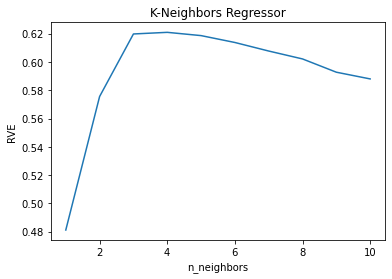

In [62]:
n = [1,2,3,4,5,6,7,8,9,10]
RVE=[]

for x in n:
    knr = KNeighborsRegressor(n_neighbors=x)
    knr.fit(nX_train, y_train)
    preds = knr.predict(nX_test)
    RVE.append(explained_variance_score(y_test, preds))
    print(RVE)
    
plt.plot(n,RVE)
plt.xlabel('n_neighbors')
plt.ylabel('RVE')
plt.title('K-Neighbors Regressor')
plt.show()

In [63]:
knr = KNeighborsRegressor()
neighbors = [1,2,3,4,5,6,7,8,9,10]
weights = ["uniform", "distance"]
param_gridKNR = {"n_neighbors": neighbors, 'weights':weights}

knr_gs = GridSearchCV(estimator=knr, param_grid=param_gridKNR, scoring="explained_variance", cv=5)

knr_gs.fit(nX_train, y_train)

cv_results = knr_gs.cv_results_

for rank in range(1, 11):
    index = np.argmax(cv_results[f'rank_test_score'] == rank)
    print(f"Rank {rank}:")
    print(f"  Params: {cv_results['params'][index]}")
    print(f"  Explained Variance: {cv_results['mean_test_score'][index]:.4f}")
    print("---")

preds = knr_gs.best_estimator_.predict(nX_test)

printRegStatistics(y_test, preds)

Rank 1:
  Params: {'n_neighbors': 5, 'weights': 'distance'}
  Explained Variance: 0.6050
---
Rank 2:
  Params: {'n_neighbors': 7, 'weights': 'distance'}
  Explained Variance: 0.6046
---
Rank 3:
  Params: {'n_neighbors': 6, 'weights': 'distance'}
  Explained Variance: 0.6039
---
Rank 4:
  Params: {'n_neighbors': 8, 'weights': 'distance'}
  Explained Variance: 0.6013
---
Rank 5:
  Params: {'n_neighbors': 5, 'weights': 'uniform'}
  Explained Variance: 0.5975
---
Rank 6:
  Params: {'n_neighbors': 4, 'weights': 'distance'}
  Explained Variance: 0.5975
---
Rank 7:
  Params: {'n_neighbors': 9, 'weights': 'distance'}
  Explained Variance: 0.5953
---
Rank 8:
  Params: {'n_neighbors': 7, 'weights': 'uniform'}
  Explained Variance: 0.5949
---
Rank 9:
  Params: {'n_neighbors': 6, 'weights': 'uniform'}
  Explained Variance: 0.5941
---
Rank 10:
  Params: {'n_neighbors': 4, 'weights': 'uniform'}
  Explained Variance: 0.5917
---
The RVE is:  0.6262478330113775
The rmse is:  0.16821657992674968
The Cor

Métricas com Feature Selection:


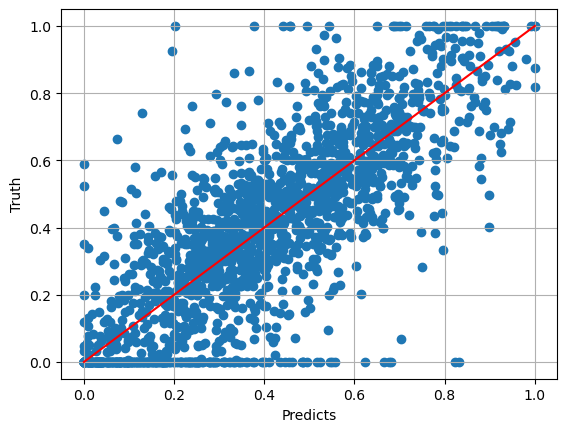

The RVE is:  0.6262478315225314
The rmse is:  0.16821658024715824
The Correlation Score is: 0.7935 (p-value=0.000000e+00)
The Maximum Error is:  0.831318338112201
The Mean Absolute Error is:  0.12185150369923904

Métricas sem Feature Selection:

The RVE is:  0.5076695536890958
The rmse is:  0.19660508699050377
The Correlation Score is: 0.7191 (p-value=4.404831e-292)
The Maximum Error is:  0.7927583319402374
The Mean Absolute Error is:  0.1416413542571241


In [13]:
knr = KNeighborsRegressor(n_neighbors=5, weights='distance')

knr.fit(nX_train, y_train)
preds = knr.predict(nX_test)
print('Métricas com Feature Selection:')
regression(y_test, preds)

knr.fit(X_train, y_train)
preds_semfs=knr.predict(X_test)
print('\nMétricas sem Feature Selection:\n')
printRegStatistics(y_test, preds_semfs)

## Extreme Gradient Boosting

In [65]:
xg_reg = XGBRegressor()

xg_reg.fit(nX_train, y_train)

preds = xg_reg.predict(nX_test)

printRegStatistics(y_test, preds)

The RVE is:  0.602282188534403
The rmse is:  0.17358854167978227
The Correlation Score is: 0.7768 (p-value=0.000000e+00)
The Maximum Error is:  0.8348945677280426
The Mean Absolute Error is:  0.1292789468582347


0.03
0.08
0.1
0.2
0.3
0.4
0.5


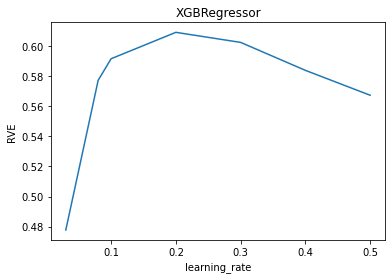

In [66]:
learning_rate = [0.03,0.08,0.1,0.2,0.3,0.4, 0.5]
RVE=[]

for x in learning_rate:
    xg_reg = XGBRegressor(learning_rate=x)
    xg_reg.fit(nX_train, y_train)
    preds = xg_reg.predict(nX_test)
    RVE.append(explained_variance_score(y_test, preds))
    print(x)
    
plt.plot(learning_rate,RVE)
plt.xlabel('learning_rate')
plt.ylabel('RVE')
plt.title("XGBRegressor")
plt.show()

20
50
80
110
150
180
200


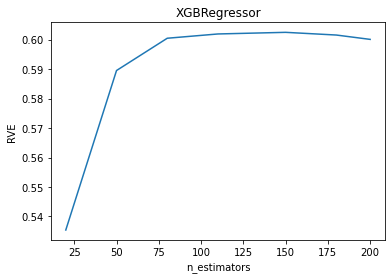

In [67]:
n_estimadores = [20,50,80,110,150,180,200]
RVE=[]

for x in n_estimadores:
    xg_reg = XGBRegressor(n_estimators=x)
    xg_reg.fit(nX_train, y_train)
    preds = xg_reg.predict(nX_test)
    RVE.append(explained_variance_score(y_test, preds))
    print(x)
    
plt.plot(n_estimadores,RVE)
plt.xlabel('n_estimators')
plt.ylabel('RVE')
plt.title("XGBRegressor")
plt.show()

In [68]:
param_grid = {
    'learning_rate': [0.15, 0.2, 0.25],
    'n_estimators': [125, 150, 175, 200],
    'booster': ['gbtree', 'gblinear']
}

xg_reg = XGBRegressor(random_state=42)

xg_gs = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring='explained_variance', cv=5)

xg_gs.fit(X, y)

cv_results = xg_gs.cv_results_

for rank in range(1, 11):
    index = np.argmax(cv_results['rank_test_score'] == rank)
    print(f"Rank {rank}:")
    print(f"  Params: {cv_results['params'][index]}")
    print(f"  Explained Variance: {cv_results['mean_test_score'][index]:.4f}")
    print("---")

preds = xg_gs.predict(X_test)

Rank 1:
  Params: {'booster': 'gbtree', 'learning_rate': 0.2, 'n_estimators': 200}
  Explained Variance: 0.6523
---
Rank 2:
  Params: {'booster': 'gbtree', 'learning_rate': 0.2, 'n_estimators': 175}
  Explained Variance: 0.6522
---
Rank 3:
  Params: {'booster': 'gbtree', 'learning_rate': 0.2, 'n_estimators': 150}
  Explained Variance: 0.6493
---
Rank 4:
  Params: {'booster': 'gbtree', 'learning_rate': 0.15, 'n_estimators': 200}
  Explained Variance: 0.6476
---
Rank 5:
  Params: {'booster': 'gbtree', 'learning_rate': 0.2, 'n_estimators': 125}
  Explained Variance: 0.6455
---
Rank 6:
  Params: {'booster': 'gbtree', 'learning_rate': 0.15, 'n_estimators': 175}
  Explained Variance: 0.6454
---
Rank 7:
  Params: {'booster': 'gbtree', 'learning_rate': 0.25, 'n_estimators': 200}
  Explained Variance: 0.6444
---
Rank 8:
  Params: {'booster': 'gbtree', 'learning_rate': 0.25, 'n_estimators': 175}
  Explained Variance: 0.6435
---
Rank 9:
  Params: {'booster': 'gbtree', 'learning_rate': 0.25, 'n_es

Métricas com Feature Selection:


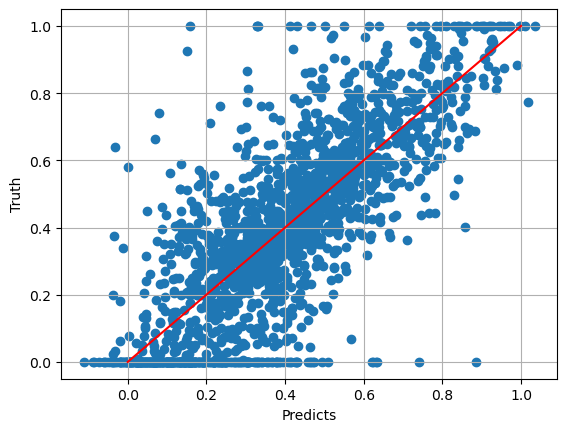

The RVE is:  0.6121971250878862
The rmse is:  0.1713352949063515
The Correlation Score is: 0.7826 (p-value=0.000000e+00)
The Maximum Error is:  0.8850588798522949
The Mean Absolute Error is:  0.12665173414993744

Métricas sem Feature Selection:

The RVE is:  0.6302583919516277
The rmse is:  0.1673817881783398
The Correlation Score is: 0.7939 (p-value=0.000000e+00)
The Maximum Error is:  0.8958694338798523
The Mean Absolute Error is:  0.1251970511646073


In [14]:
xg_reg = XGBRegressor(booster='gbtree', learning_rate=0.2, n_estimators=150)

xg_reg.fit(nX_train, y_train)
preds = xg_reg.predict(nX_test)
print('Métricas com Feature Selection:')
regression(y_test, preds)

xg_reg.fit(X_train, y_train)
preds_semfs=xg_reg.predict(X_test)
print('\nMétricas sem Feature Selection:\n')
printRegStatistics(y_test, preds_semfs)

## Redes neuronais

In [70]:
mlp_reg = MLPRegressor(random_state=42)
mlp_reg.fit(nX_train, y_train)
preds = mlp_reg.predict(nX_test)
printRegStatistics(y_test, preds)

The RVE is:  -0.13034275601226808
The rmse is:  0.2924939712616281
The Correlation Score is: 0.5546 (p-value=1.737394e-148)
The Maximum Error is:  1.2990147170077477
The Mean Absolute Error is:  0.22255024151190222


## AdaBoost

In [71]:
abc = AdaBoostRegressor()
abc.fit(nX_train, y_train)
preds = abc.predict(nX_test)
printRegStatistics(y_test, preds)

The RVE is:  0.15669156253295347
The rmse is:  0.25697736979184166
The Correlation Score is: 0.5702 (p-value=9.442276e-159)
The Maximum Error is:  0.578681277192227
The Mean Absolute Error is:  0.21179663597363715


## IVS

In [17]:
svr = SVR(kernel='rbf', C=1, epsilon=0.03, gamma='scale')

svr.fit(X_total, y)

preds_ivs = svr.predict(nX_IVS)

In [18]:
preds_ivs

array([0.13837051, 0.14432504, 0.14252409, 0.14204123, 0.14235268,
       0.133528  , 0.14547072, 0.14734037, 0.14396088, 0.14701907,
       0.14481706, 0.13608219, 0.15285354, 0.13988598, 0.13650278,
       0.14020451, 0.13866562, 0.14047181, 0.14051351, 0.14530197,
       0.14238453, 0.1369471 , 0.14146194, 0.1394244 , 0.14268776,
       0.14094212, 0.14299815, 0.13809152, 0.14496271, 0.142849  ,
       0.12829704, 0.1451263 , 0.14508245, 0.1427975 , 0.14546952,
       0.1426784 , 0.14086216, 0.14385824, 0.13969036, 0.14248251,
       0.13883003, 0.1387607 , 0.13824281, 0.14172816, 0.13786893,
       0.14065738, 0.14656378, 0.13962395, 0.1426364 , 0.13940224,
       0.1423941 , 0.13042991, 0.13618414, 0.13944033, 0.14229135,
       0.14472942, 0.15099525, 0.13981152, 0.14374685, 0.14328094,
       0.1381375 , 0.14689136, 0.14079915, 0.14350073, 0.14680557,
       0.13615433, 0.14414798, 0.14027745, 0.13891065, 0.13989184,
       0.1402028 , 0.13840404, 0.14412544, 0.13831384, 0.14327

In [22]:
np.savetxt('12.txt', preds_ivs, fmt='%.3f')